# Digist recognition

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib
from matplotlib import pyplot as plt
matplotlib.pyplot.style.use('ggplot')

/Users/emeli/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/emeli/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/emeli/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/emeli/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data loading

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

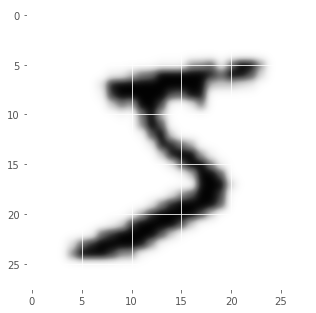

In [6]:
plt.figure(figsize = (5, 6))
plt.imshow(x_train[0], cmap = 'Greys', interpolation = 'gaussian')

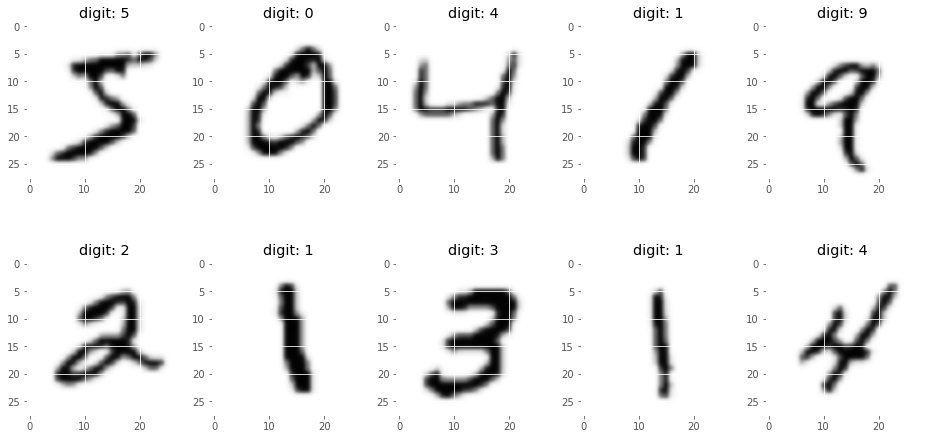

In [7]:
plt.figure(figsize = (16, 8))

for plot_number, plot in enumerate(x_train[:10]):
    plt.subplot(2, 5, plot_number + 1)
    plt.imshow(plot, cmap = 'Greys', interpolation = 'gaussian')
    plt.title('digit: ' + str(y_train[plot_number]))

## Data preprocessing

In [8]:
x_train.shape

(60000, 28, 28)

In [24]:
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size).astype("float32") / 255 
x_test = x_test.reshape(x_test.shape[0], image_size).astype("float32") / 255

In [25]:
x_train.shape

(50000, 784)

In [26]:
y_train = y_train #.astype("float32")
y_test = y_test #.astype("float32")

In [27]:
y_train[0]

5

In [28]:
# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

## Model construction

In [29]:
model = keras.models.Sequential([
   layers.Dense(1024, activation='relu', input_shape=(784,)),
   layers.Dense(128, activation='tanh'),
   layers.Dropout(rate=0.95),
   layers.Dense(64, activation='relu'),
   layers.Dense(10, activation='softmax')
])

In [30]:
model.layers

In [31]:
model.compile(
   optimizer='SGD',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

In [32]:
model.fit(
   x=x_train,
   y=keras.utils.to_categorical(y_train),
   epochs=10,
   batch_size=64,
   shuffle=True
)

Epoch 1/10
40000/40000 [==============================] - 7s 182us/sample - loss: 1.7566 - acc: 0.3767
Epoch 2/10
40000/40000 [==============================] - 7s 180us/sample - loss: 1.2517 - acc: 0.5550
Epoch 3/10
40000/40000 [==============================] - 7s 187us/sample - loss: 1.0639 - acc: 0.6232
Epoch 4/10
40000/40000 [==============================] - 8s 197us/sample - loss: 0.9615 - acc: 0.6622
Epoch 5/10
40000/40000 [==============================] - 7s 179us/sample - loss: 0.8700 - acc: 0.6973
Epoch 6/10
40000/40000 [==============================] - 7s 171us/sample - loss: 0.8000 - acc: 0.7191
Epoch 7/10
40000/40000 [==============================] - 8s 194us/sample - loss: 0.7437 - acc: 0.7381
Epoch 8/10
40000/40000 [==============================] - 7s 164us/sample - loss: 0.6977 - acc: 0.7549
Epoch 9/10
40000/40000 [==============================] - 6s 162us/sample - loss: 0.6510 - acc: 0.7716
Epoch 10/10
40000/40000 [==============================] - 8s 208us/sampl

## Model evaluation

In [33]:
train_evaluation = model.evaluate(x_train, keras.utils.to_categorical(y_train))

40000/40000 [==============================] - 5s 116us/sample - loss: 0.2079 - acc: 0.9417


In [34]:
test_evaluation = model.evaluate(x_test, keras.utils.to_categorical(y_test))

10000/10000 [==============================] - 1s 107us/sample - loss: 0.2103 - acc: 0.9424


In [35]:
train_evaluation

[0.20793022303581238, 0.94175]

In [36]:
test_evaluation

[0.21028974992334842, 0.9424]